Athletes Dataset - An Exploratory Data Analysis
The file athlete_events.csv contains 2,71,116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

          1.     ID - Unique number for each athlete

2.     Name - Athlete's name

3.     Sex - M or F

4.     Age - Integer

5.     Height - In centimeters

6.     Weight - In kilograms

7.     Team - Team name

8.     NOC - National Olympic Committee 3-letter code

9.     Games - Year and season

10. Year - Integer

11.                        Season - Summer or Winter

12.                        City - Host city

13.                        Sport - Sport

14.                        Event - Event

15.                        Medal - Gold, Silver, Bronze, or NA

In [91]:
# standard library import
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [92]:
#load dataset
athlete=pd.read_csv('athlete_events.csv')
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [93]:
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [94]:
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [95]:
athlete.isnull().sum() # checking for total null values

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [96]:
# there are lot of missing values for age, height and weight.
# The missing value seen against medal is because it indicates the number of people who did not get a medal

In [97]:
athlete.shape

(271116, 15)

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

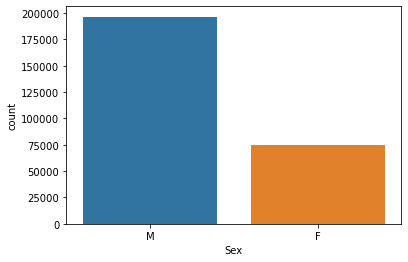

In [98]:
sns.countplot('Sex',data=athlete)

([<matplotlib.patches.Wedge at 0x7fa139a7be50>,
 [Text(-0.8361576252945936, -0.7147310163003325, ''),
  Text(0.8361576922125369, 0.7147309380136029, '')],
 [Text(-0.4560859774334146, -0.38985328161836313, '72.51%'),
  Text(0.45608601393411097, 0.38985323891651064, '27.49%')])

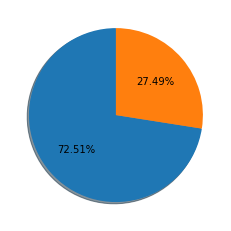

In [99]:
plt.pie(athlete.Sex.value_counts(),autopct='%.2f%%',shadow=True, startangle=90)

In [100]:
# >72% of the participants are male

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

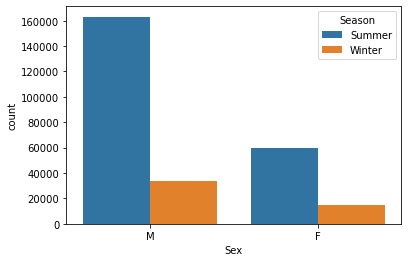

In [101]:
sns.countplot('Sex',data=athlete,hue='Season')

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

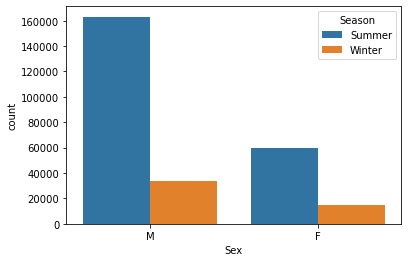

In [102]:
sns.countplot('Sex',data=athlete,hue='Season')

In [103]:
# In Winter, the difference between male and female seems to be less as compared to summer.
#let's check if distribution of medals is more in winter for women that in summer

([<matplotlib.patches.Wedge at 0x7fa169a7abb0>,
 [Text(-0.9121719548668293, -0.7797065632367264, ''),
  Text(0.912172027868222, 0.7797064778330213, '')],
 [Text(-0.5321003070056504, -0.454828828554757, '72.51%'),
  Text(0.5321003495897961, 0.4548287787359291, '27.49%')])

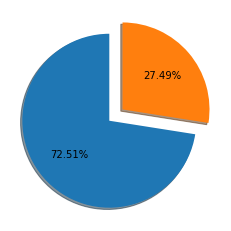

In [130]:
plt.pie(athlete.Sex.value_counts('Season'=='Winter'),autopct='%.2f%%',shadow=True, startangle=90,explode=[.1]*2)

<AxesSubplot:xlabel='count', ylabel='NOC'>

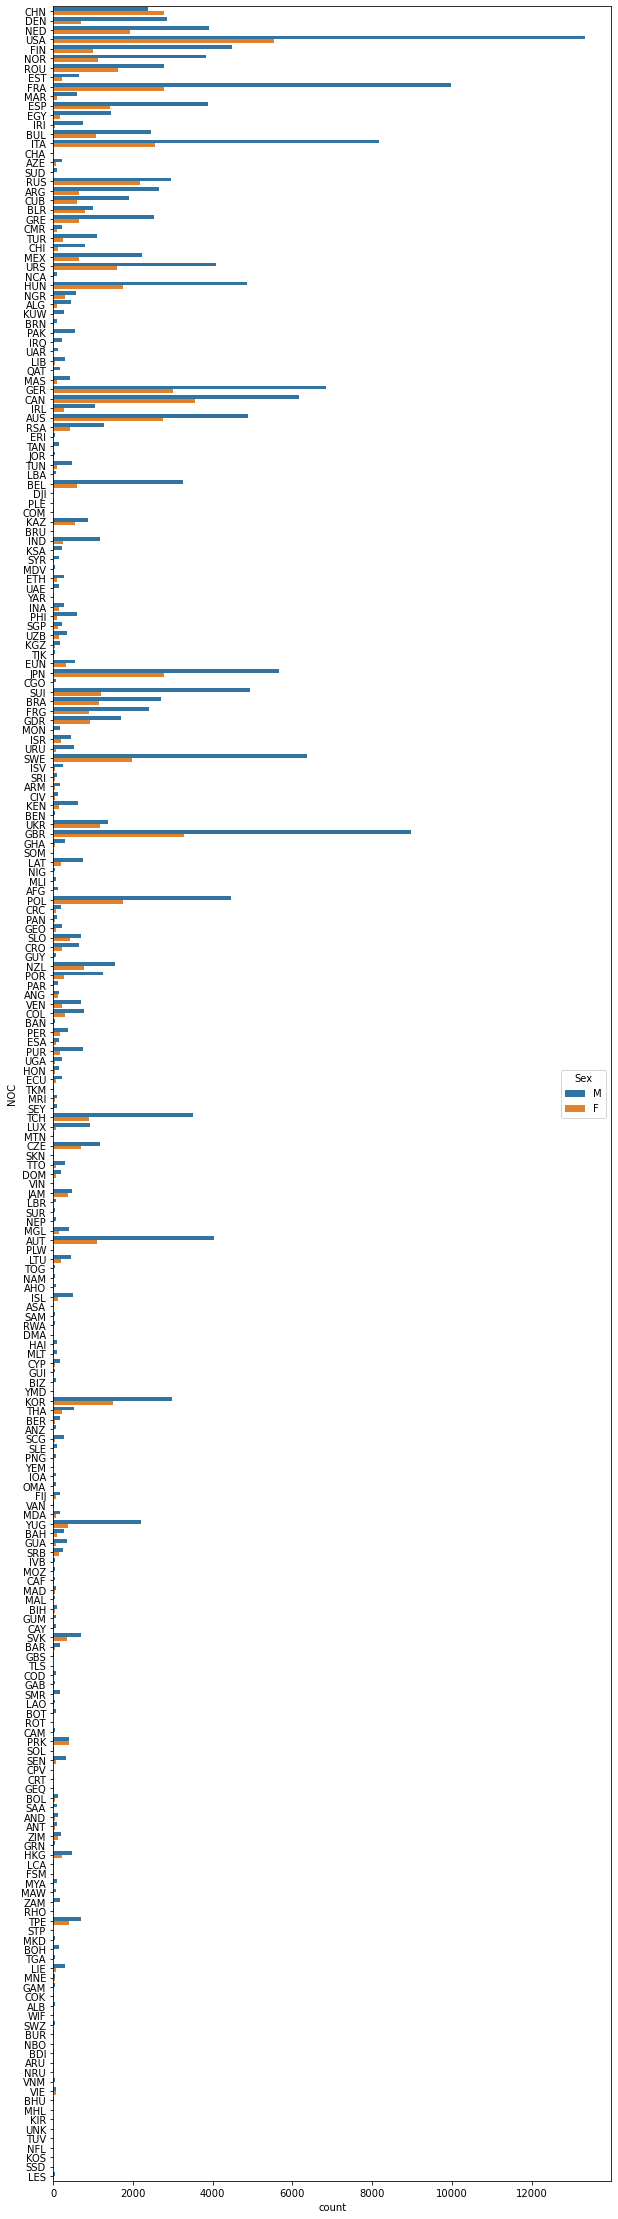

In [296]:
fig,ax = plt.subplots(figsize=(10,40))
sns.countplot(y='NOC',data=athlete,hue='Sex')

In [105]:
athlete.groupby(by='Sex').sum()

,ID,Age,Height,Weight,Year
Sex,,,,,
F,5213314903,1758559.0,11308706.0,4007679.0,148481042
M,13290068617,4928199.0,25678173.0,10715458.0,387889018


In [106]:
pd.crosstab(athlete['Sex'],athlete['Season'],normalize=True)

Season,Summer,Winter
Sex,,
F,0.219253,0.055618
M,0.601621,0.123508


In [107]:
pd.crosstab(athlete['Sex'],athlete['Medal'])

Medal,Bronze,Gold,Silver
Sex,,,
F,3771,3747,3735
M,9524,9625,9381


In [108]:
pd.crosstab(athlete['Sex'],athlete['Medal'],normalize=True)

Medal,Bronze,Gold,Silver
Sex,,,
F,0.094789,0.094186,0.093884
M,0.239399,0.241938,0.235804


In [109]:
pd.crosstab(athlete['Sex'],[athlete.Medal,athlete.Season])

Medal  Bronze          Gold        Silver       
Season Summer Winter Summer Winter Summer Winter
Sex                                             
F        3174    597   3140    607   3128    607
M        8235   1289   8319   1306   8092   1289

In [110]:
pd.crosstab(athlete['Medal'],[athlete.Season,athlete.Sex],margins=True)

Season Summer        Winter          All
Sex         F      M      F     M       
Medal                                   
Bronze   3174   8235    597  1289  13295
Gold     3140   8319    607  1306  13372
Silver   3128   8092    607  1289  13116
All      9442  24646   1811  3884  39783

In [115]:
pd.crosstab(athlete['Medal'],[athlete.Season,athlete.Sex],normalize=True,margins=True)

Season    Summer              Winter                 All
Sex            F         M         F         M          
Medal                                                   
Bronze  0.079783  0.206998  0.015006  0.032401  0.334188
Gold    0.078928  0.209109  0.015258  0.032828  0.336123
Silver  0.078627  0.203403  0.015258  0.032401  0.329689
All     0.237338  0.619511  0.045522  0.097630  1.000000

In [116]:
# in accordance to the increase in participation in winter season, 
# there is also increase in noumber of medals won bt women in winter

<AxesSubplot:xlabel='Sex', ylabel='Height'>

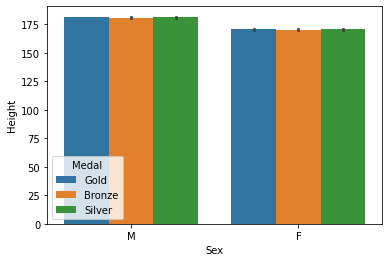

In [136]:
sns.barplot(x=athlete.Sex,y=athlete.Height,hue=athlete.Medal)

In [134]:
# The women population is on average shorter than the men population
#there does not seem to be a significant difference in the height based on medal categories

<AxesSubplot:xlabel='Season', ylabel='Height'>

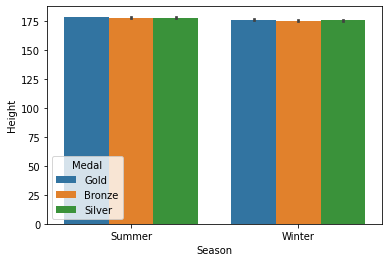

In [137]:
sns.barplot(x=athlete.Season,y=athlete.Height,hue=athlete.Medal)

In [138]:
# There is not much difference in heights of the athletes based on season

<AxesSubplot:xlabel='Season', ylabel='Height'>

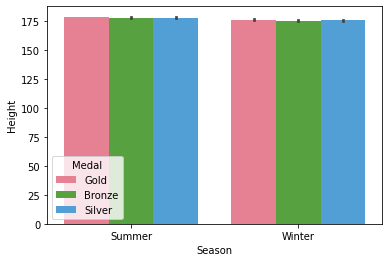

In [143]:
sns.barplot(x=athlete.Season,y=athlete.Height,hue=athlete.Medal,palette='husl')

<AxesSubplot:xlabel='Year', ylabel='Height'>

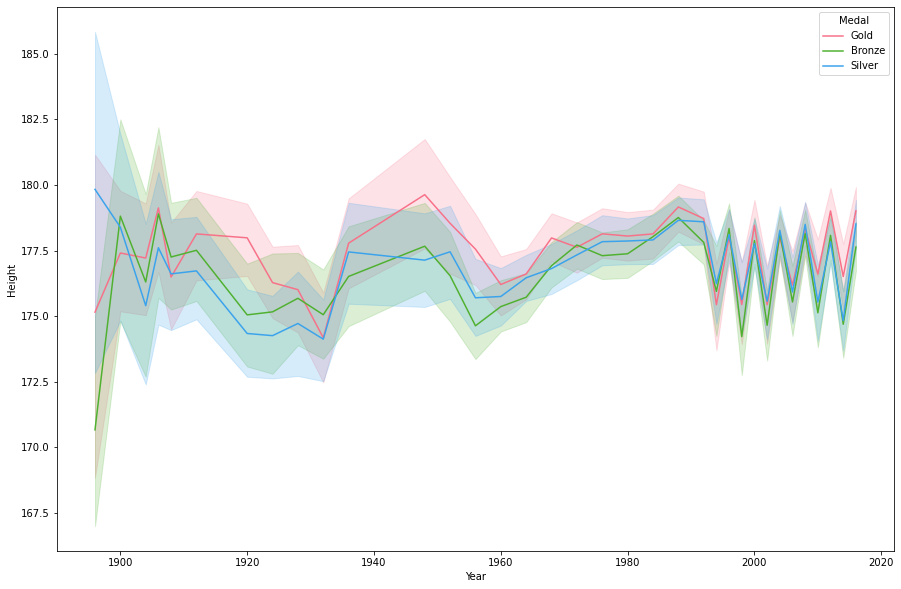

In [158]:
# Let's review the years and the corresponding medals across height
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=athlete.Year,y=athlete.Height,hue=athlete.Medal,palette='husl')

<AxesSubplot:xlabel='Year', ylabel='Height'>

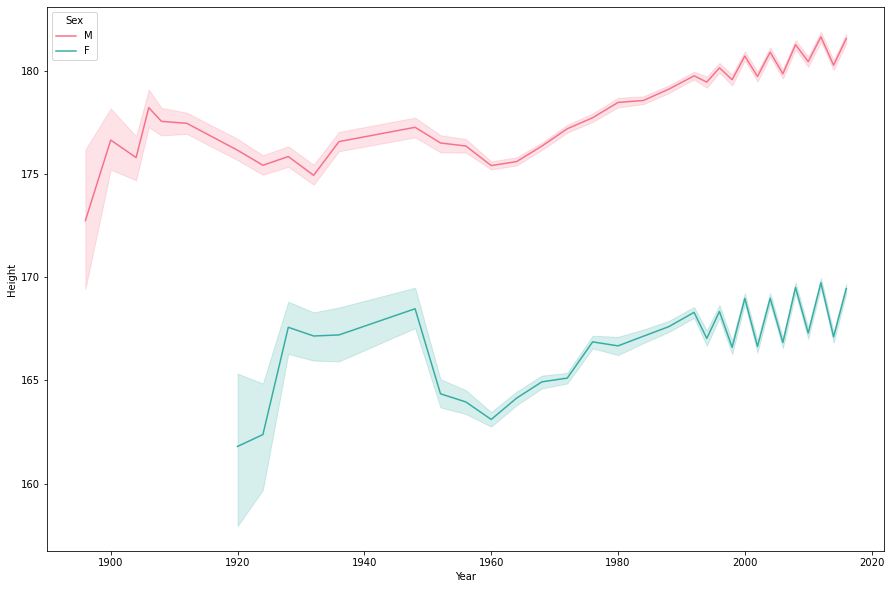

In [159]:
# In the recent years, here seems to have been frequent change in the height data.
#let's review the weight
fig,ax = plt.subplots(figsize=(15,10))
sns.lineplot(x=athlete.Year,y=athlete.Height,hue=athlete.Sex,palette='husl')

In [160]:
#women particpation in athletics started almost 20 years later
#Now, let's review the distribution of continuours varibales
athlete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [162]:
athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<AxesSubplot:xlabel='Sex', ylabel='Height'>

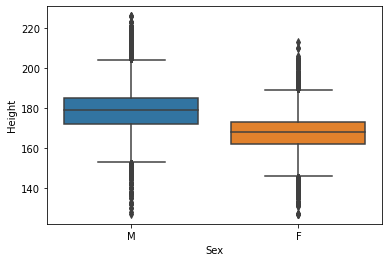

In [166]:
sns.boxplot(y=athlete.Height,x=athlete.Sex)

<AxesSubplot:xlabel='Season', ylabel='Height'>

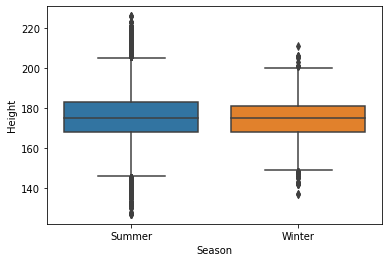

In [167]:
sns.boxplot(y=athlete.Height,x=athlete.Season)

<AxesSubplot:xlabel='Season', ylabel='Height'>

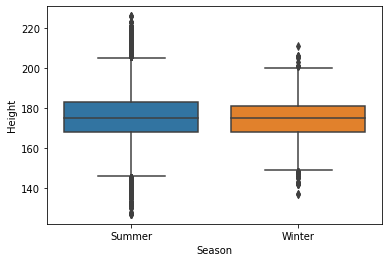

In [168]:
sns.boxplot(y=athlete.Height,x=athlete.Season)

<AxesSubplot:xlabel='Medal', ylabel='Height'>

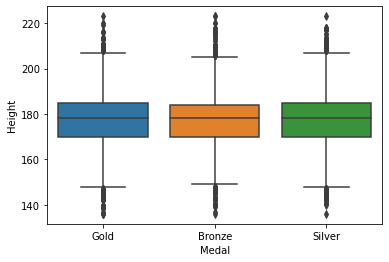

In [169]:
sns.boxplot(y=athlete.Height,x=athlete.Medal)

<AxesSubplot:xlabel='Height', ylabel='NOC'>

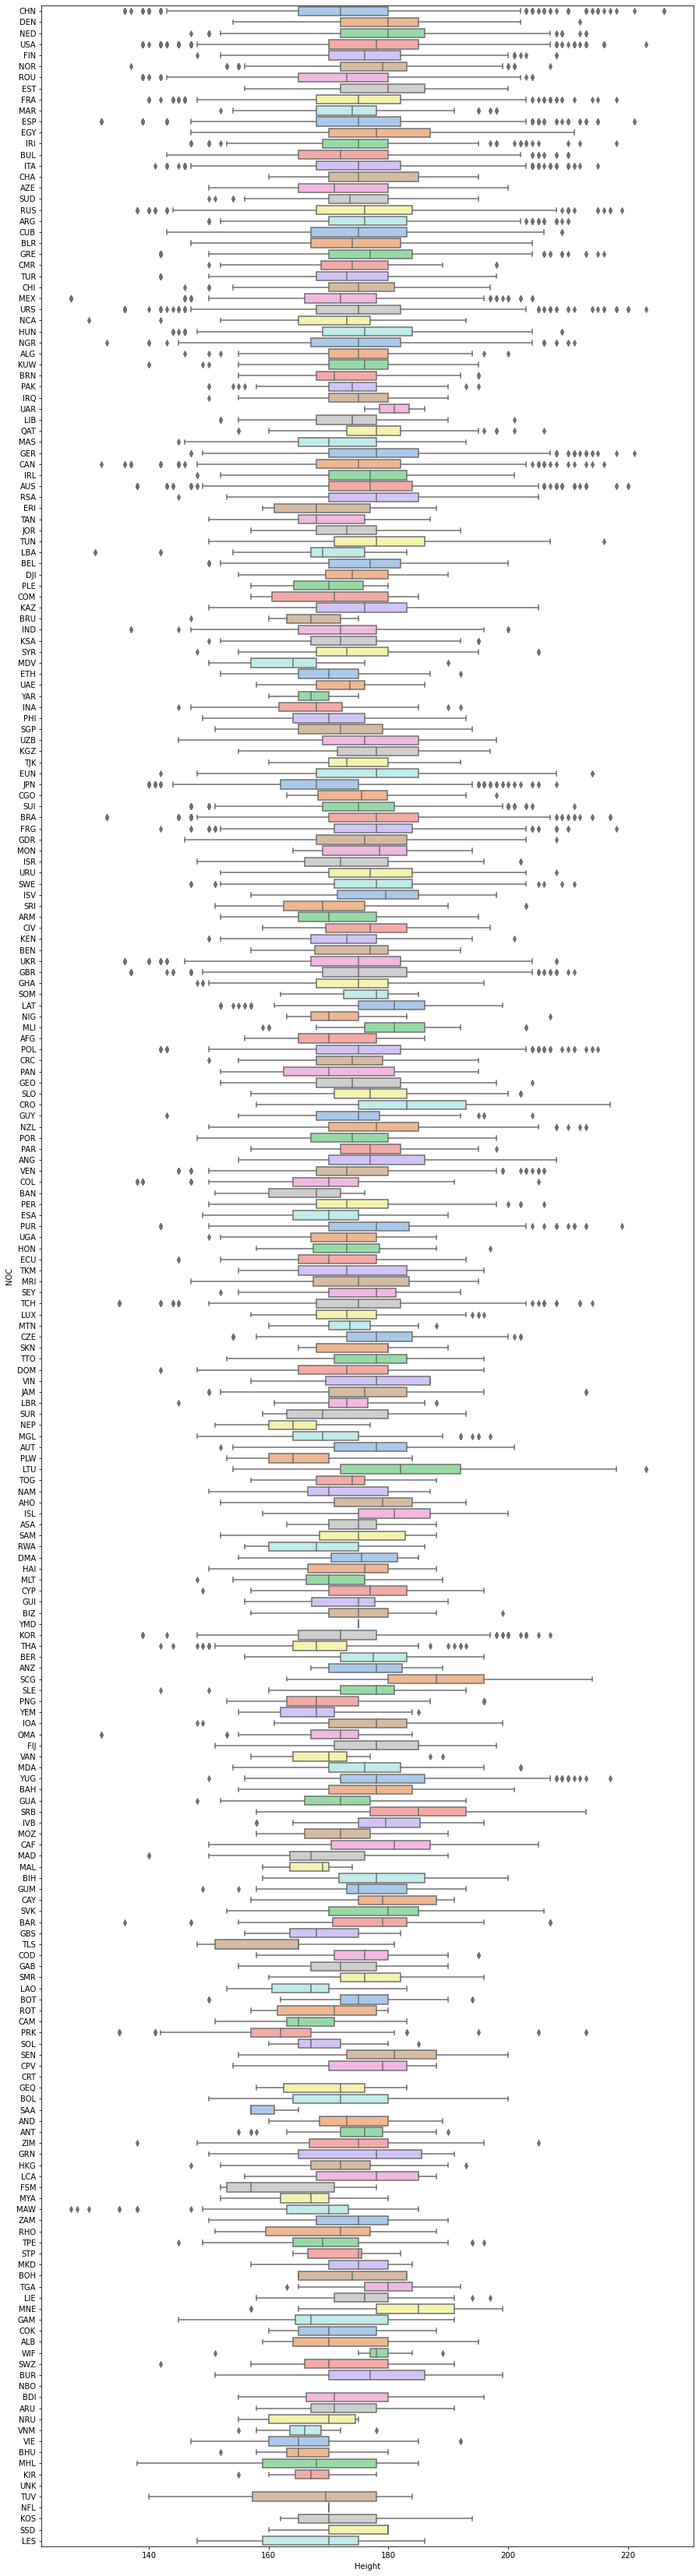

In [179]:
fig,ax = plt.subplots(figsize=(15,60))
sns.boxplot(x=athlete.Height,y=athlete.NOC,palette='pastel')

<AxesSubplot:xlabel='Weight', ylabel='NOC'>

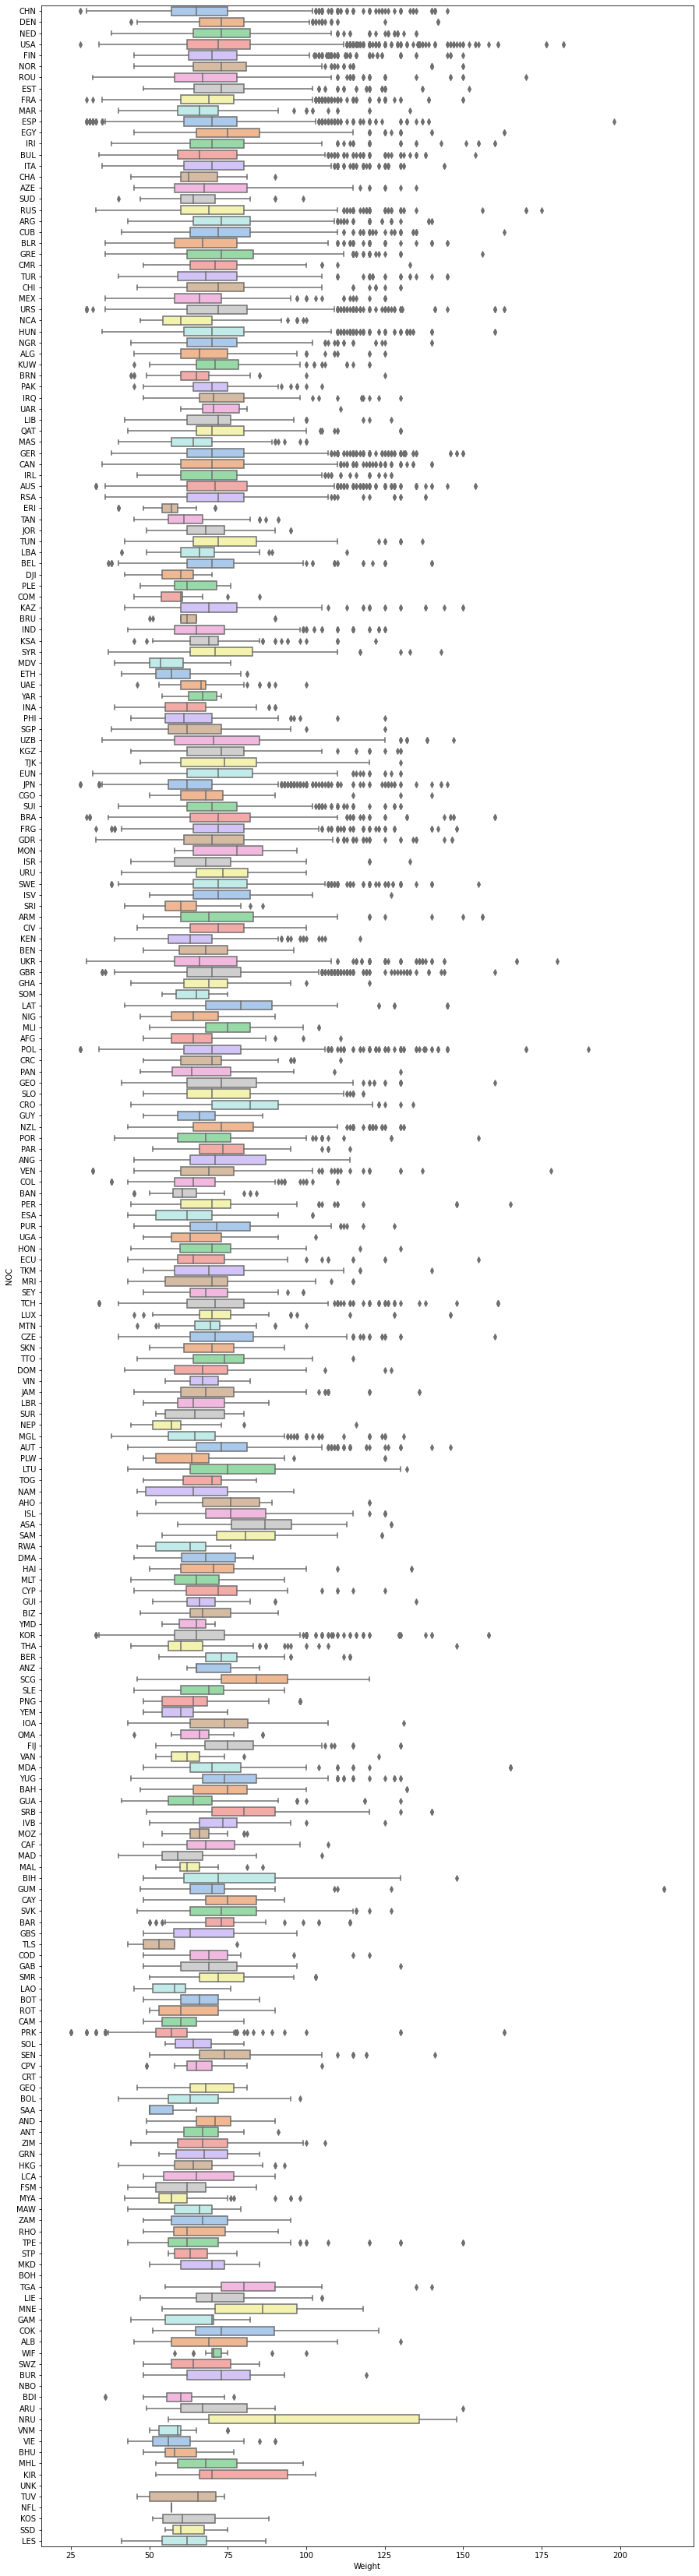

In [181]:
fig,ax = plt.subplots(figsize=(15,60))
sns.boxplot(x=athlete.Weight,y=athlete.NOC,palette='pastel')

<AxesSubplot:xlabel='Height', ylabel='Sex'>

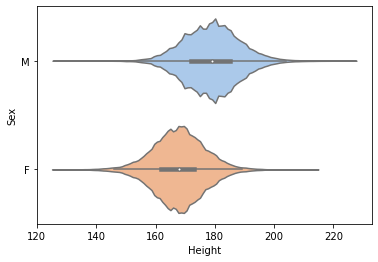

In [183]:
sns.violinplot(x=athlete.Height,y=athlete.Sex,palette='pastel')

<AxesSubplot:xlabel='Height', ylabel='Medal'>

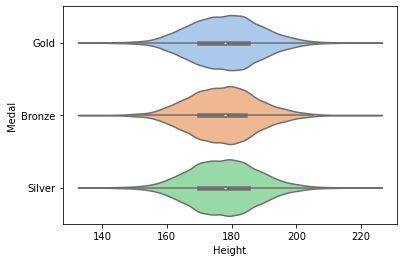

In [184]:
sns.violinplot(x=athlete.Height,y=athlete.Medal,palette='pastel')

<AxesSubplot:xlabel='Height', ylabel='Season'>

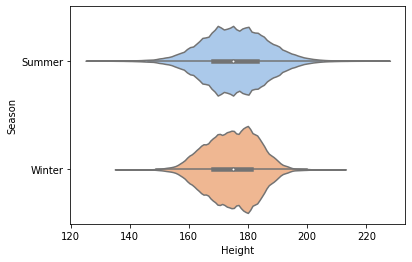

In [185]:
sns.violinplot(x=athlete.Height,y=athlete.Season,palette='pastel')

In [ ]:
# There is more variation in heaight during summer season than winter

<AxesSubplot:xlabel='Height', ylabel='Season'>

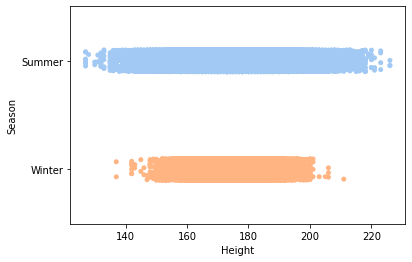

In [188]:
sns.stripplot(x=athlete.Height,y=athlete.Season,palette='pastel')

<AxesSubplot:xlabel='Weight', ylabel='Density'>

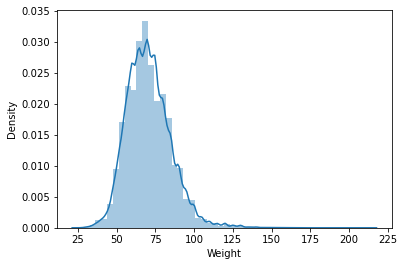

In [215]:
sns.distplot(athlete.Weight)
# it is almost normal distribution with not heavy skew if we remove the outliers

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

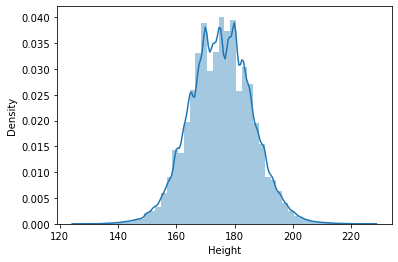

In [219]:
sns.distplot(athlete.Height)
# it is almost normal distribution

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/ca

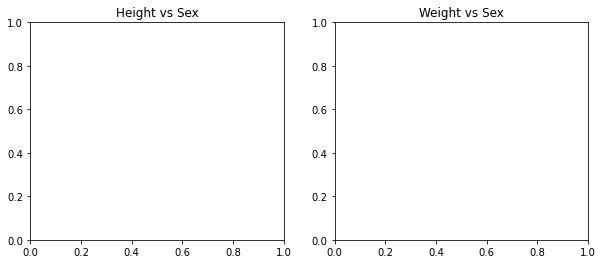

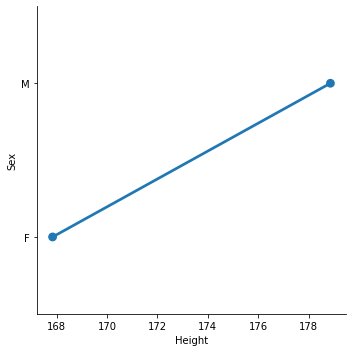

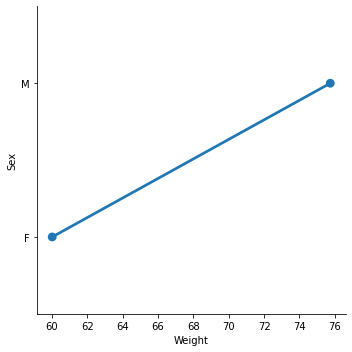

In [227]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.factorplot('Height','Sex',data=athlete,ax=ax[0])
ax[0].set_title('Height vs Sex')
sns.factorplot('Weight','Sex',data=athlete,ax=ax[1])
ax[1].set_title('Weight vs Sex')
plt.show()

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/ca

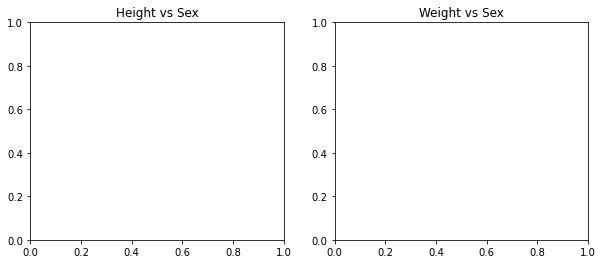

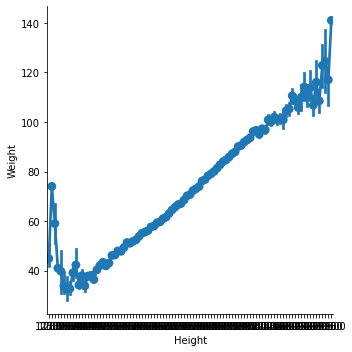

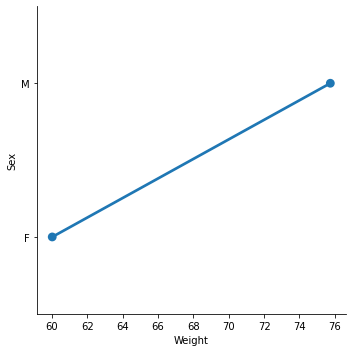

In [228]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.factorplot('Height','Weight',data=athlete,ax=ax[0])
ax[0].set_title('Height vs Sex')
sns.factorplot('Weight','Sex',data=athlete,ax=ax[1])
ax[1].set_title('Weight vs Sex')
plt.show()

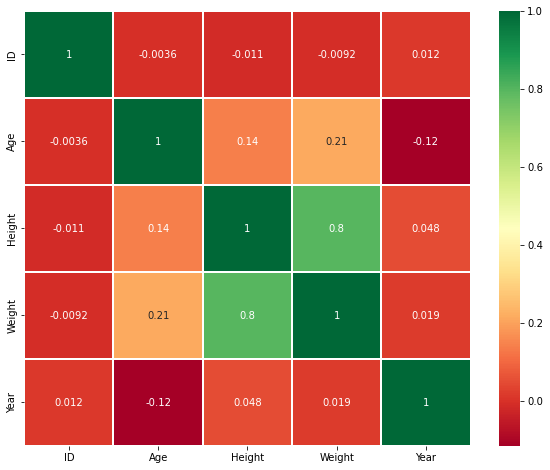

In [229]:
sns.heatmap(athlete.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

<AxesSubplot:xlabel='Height', ylabel='Weight'>

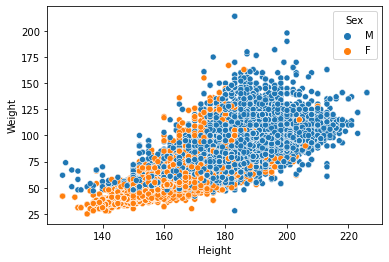

In [232]:
sns.scatterplot(data=athlete, x="Height",y="Weight", hue='Sex')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

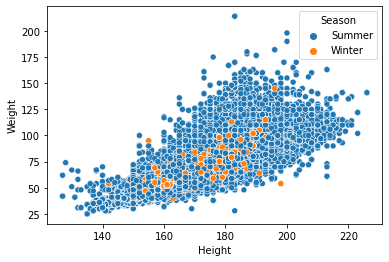

In [233]:
sns.scatterplot(data=athlete, x="Height",y="Weight", hue='Season')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

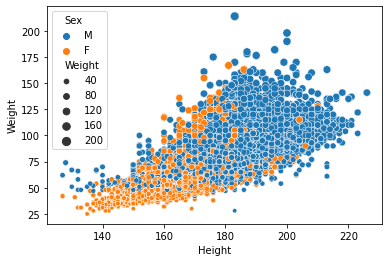

In [238]:
sns.scatterplot(data=athlete, x="Height",y="Weight", hue='Sex',size='Weight')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

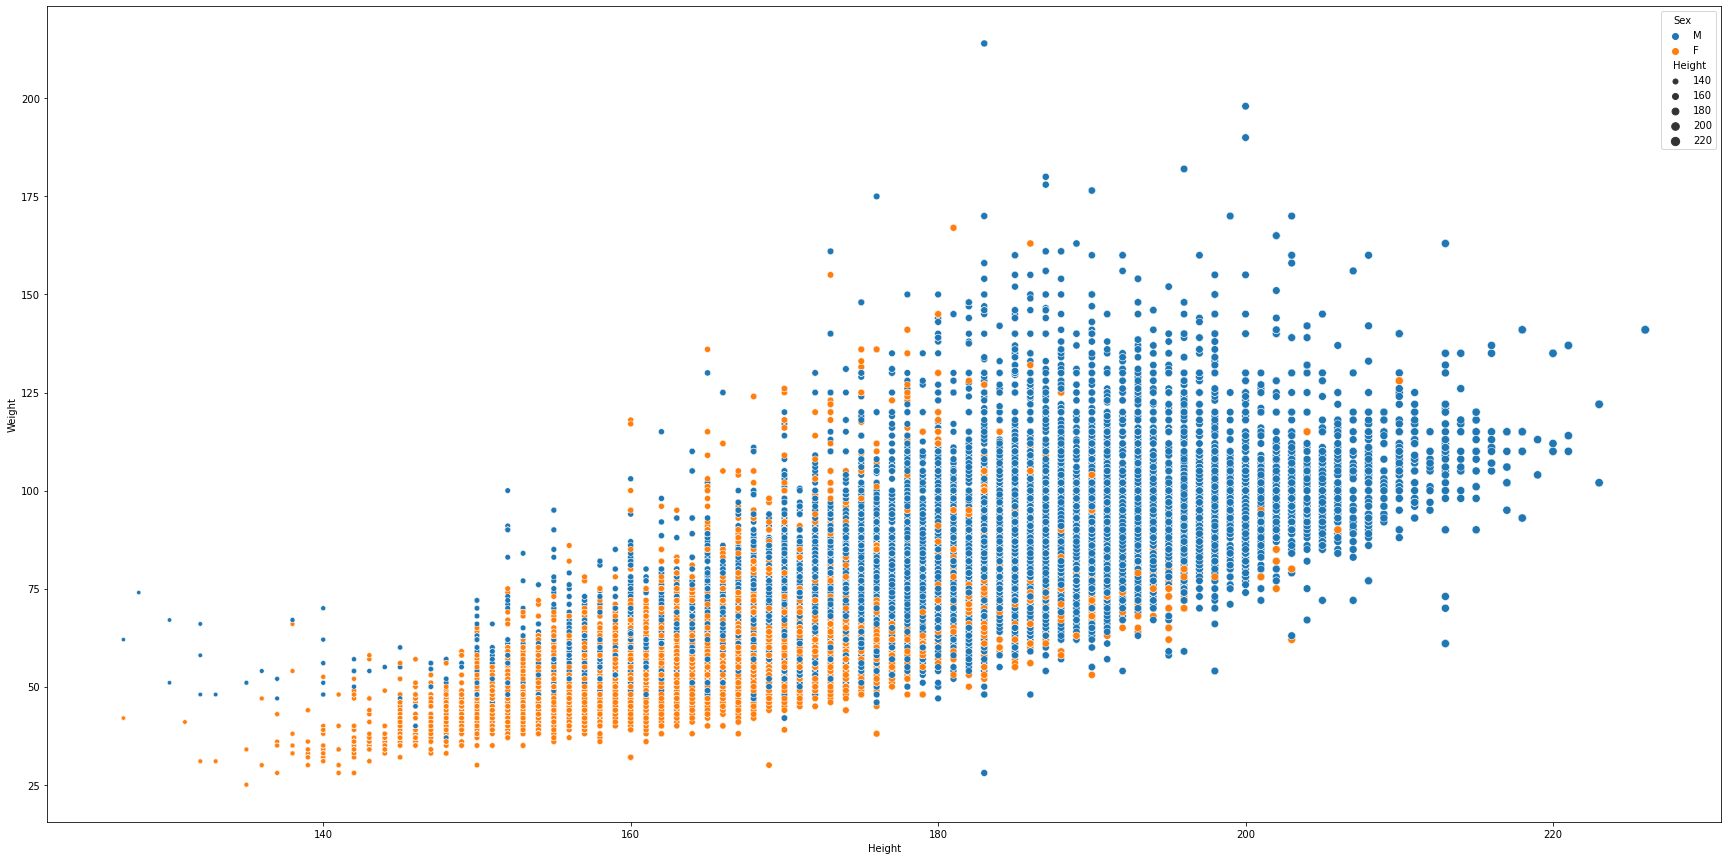

In [241]:
fig,ax = plt.subplots(figsize=(30,15))
sns.scatterplot(data=athlete, x="Height",y="Weight", hue='Sex',size='Height')

In [242]:
# Generally, female height and weight is much lesser compared to male

<AxesSubplot:xlabel='Height', ylabel='Weight'>

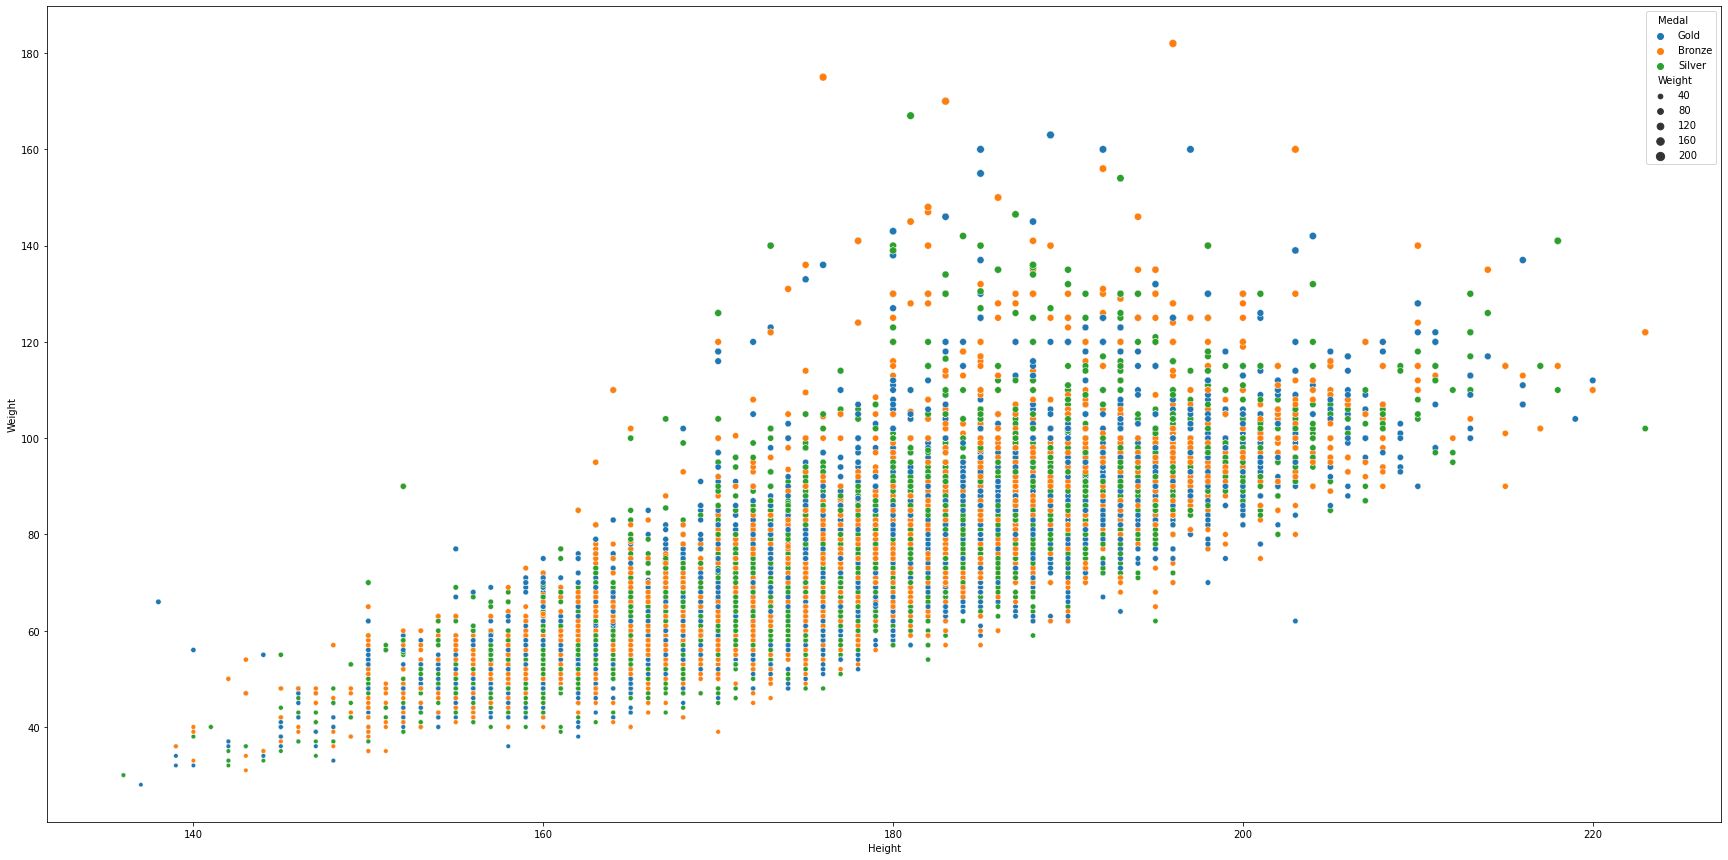

In [244]:
fig,ax = plt.subplots(figsize=(30,15))
sns.scatterplot(data=athlete, x="Height",y="Weight", hue='Medal',size='Weight')

<AxesSubplot:xlabel='Year', ylabel='Weight'>

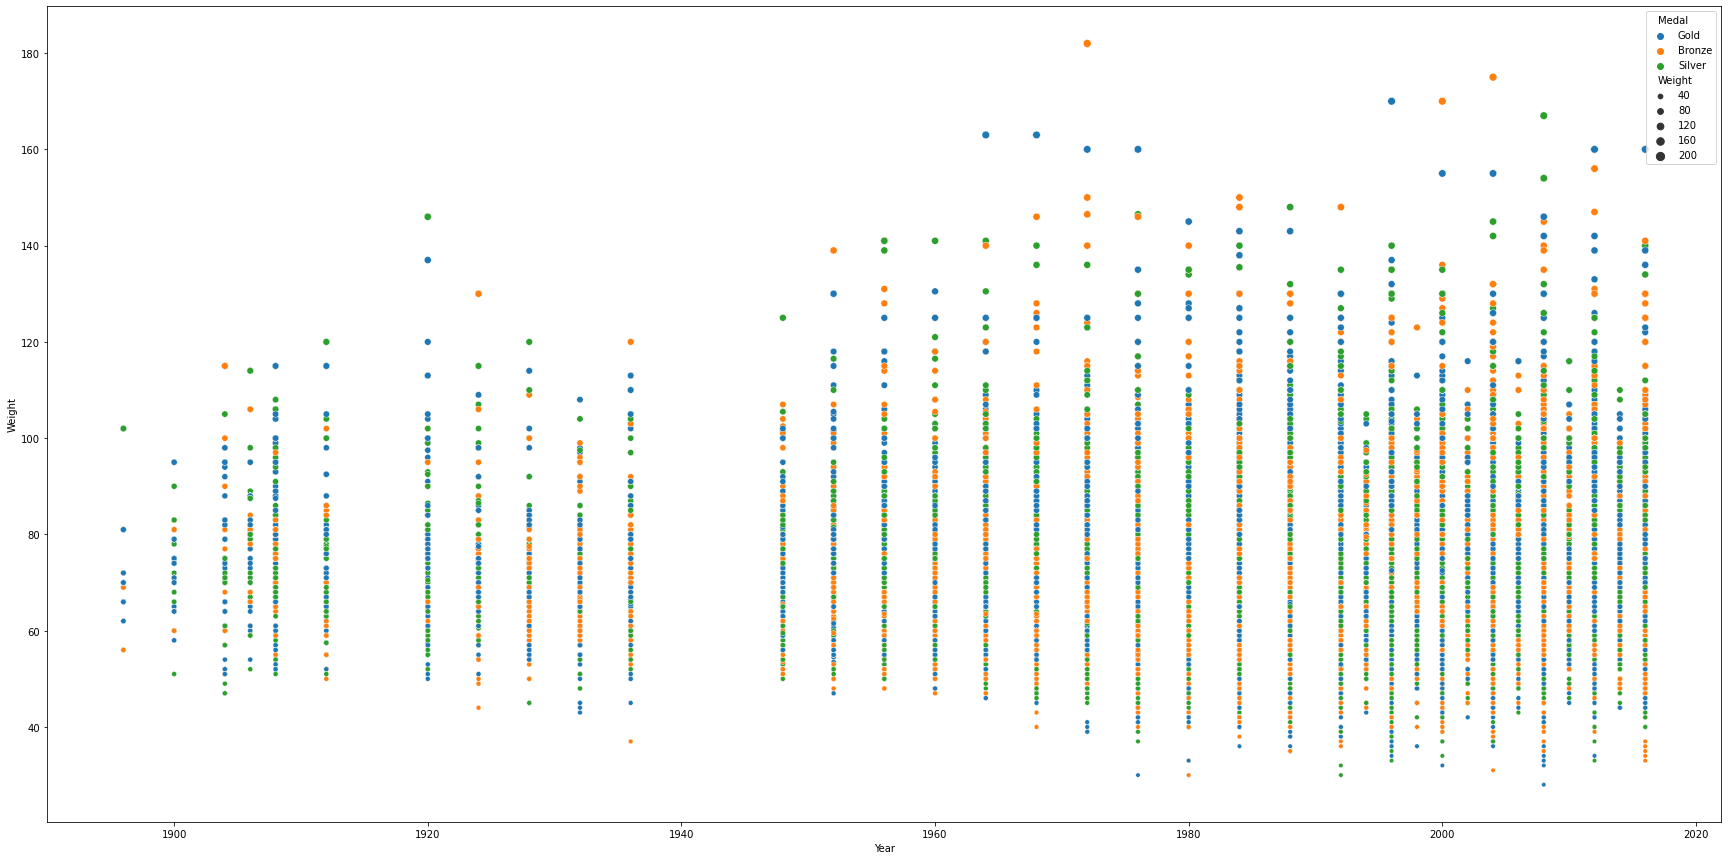

In [245]:
fig,ax = plt.subplots(figsize=(30,15))
sns.scatterplot(data=athlete, x="Year",y="Weight", hue='Medal',size='Weight')

<AxesSubplot:xlabel='Year', ylabel='Weight'>

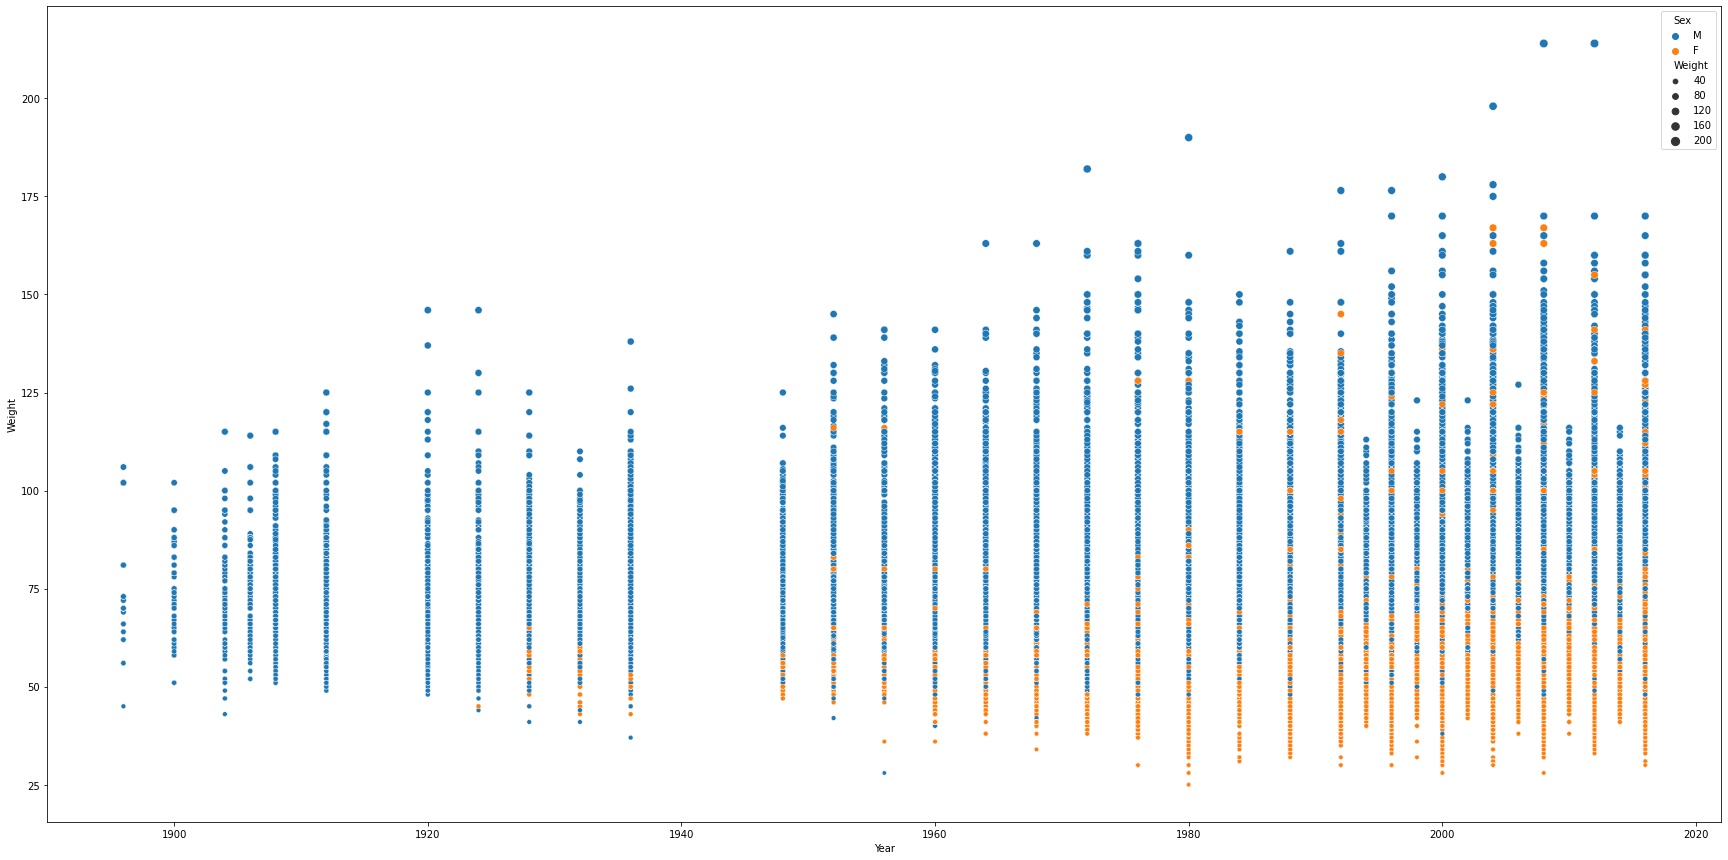

In [246]:
fig,ax = plt.subplots(figsize=(30,15))
sns.scatterplot(data=athlete, x="Year",y="Weight", hue='Sex',size='Weight')

<AxesSubplot:xlabel='Year', ylabel='Weight'>

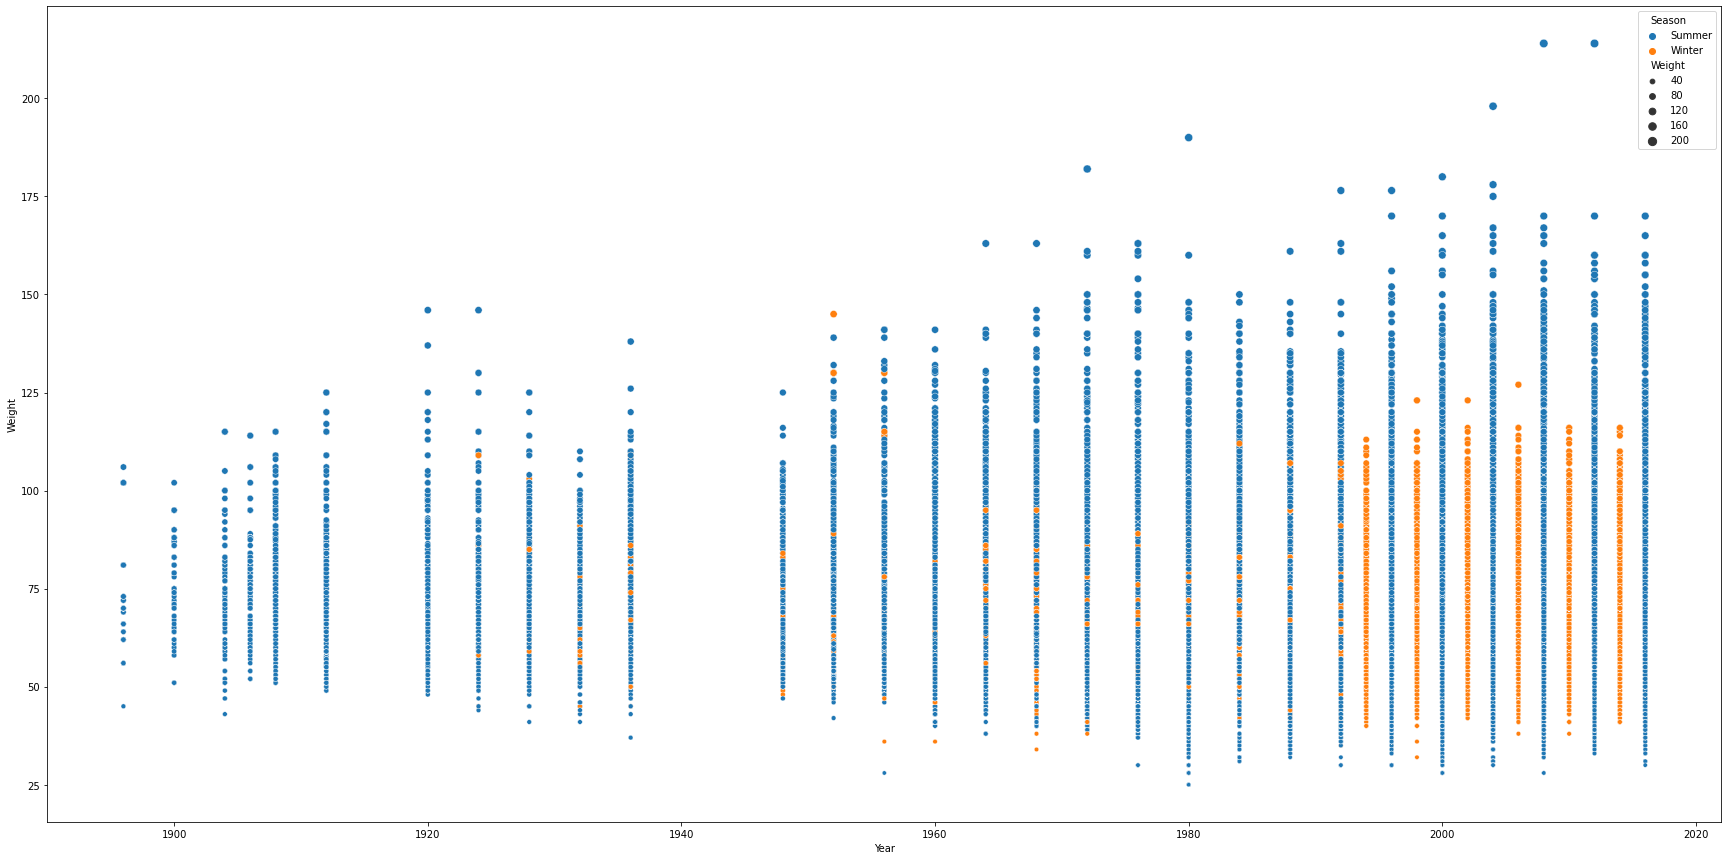

In [249]:
fig,ax = plt.subplots(figsize=(30,15))
sns.scatterplot(data=athlete, x="Year",y="Weight", hue='Season',size='Weight')

<AxesSubplot:xlabel='Weight', ylabel='Year'>

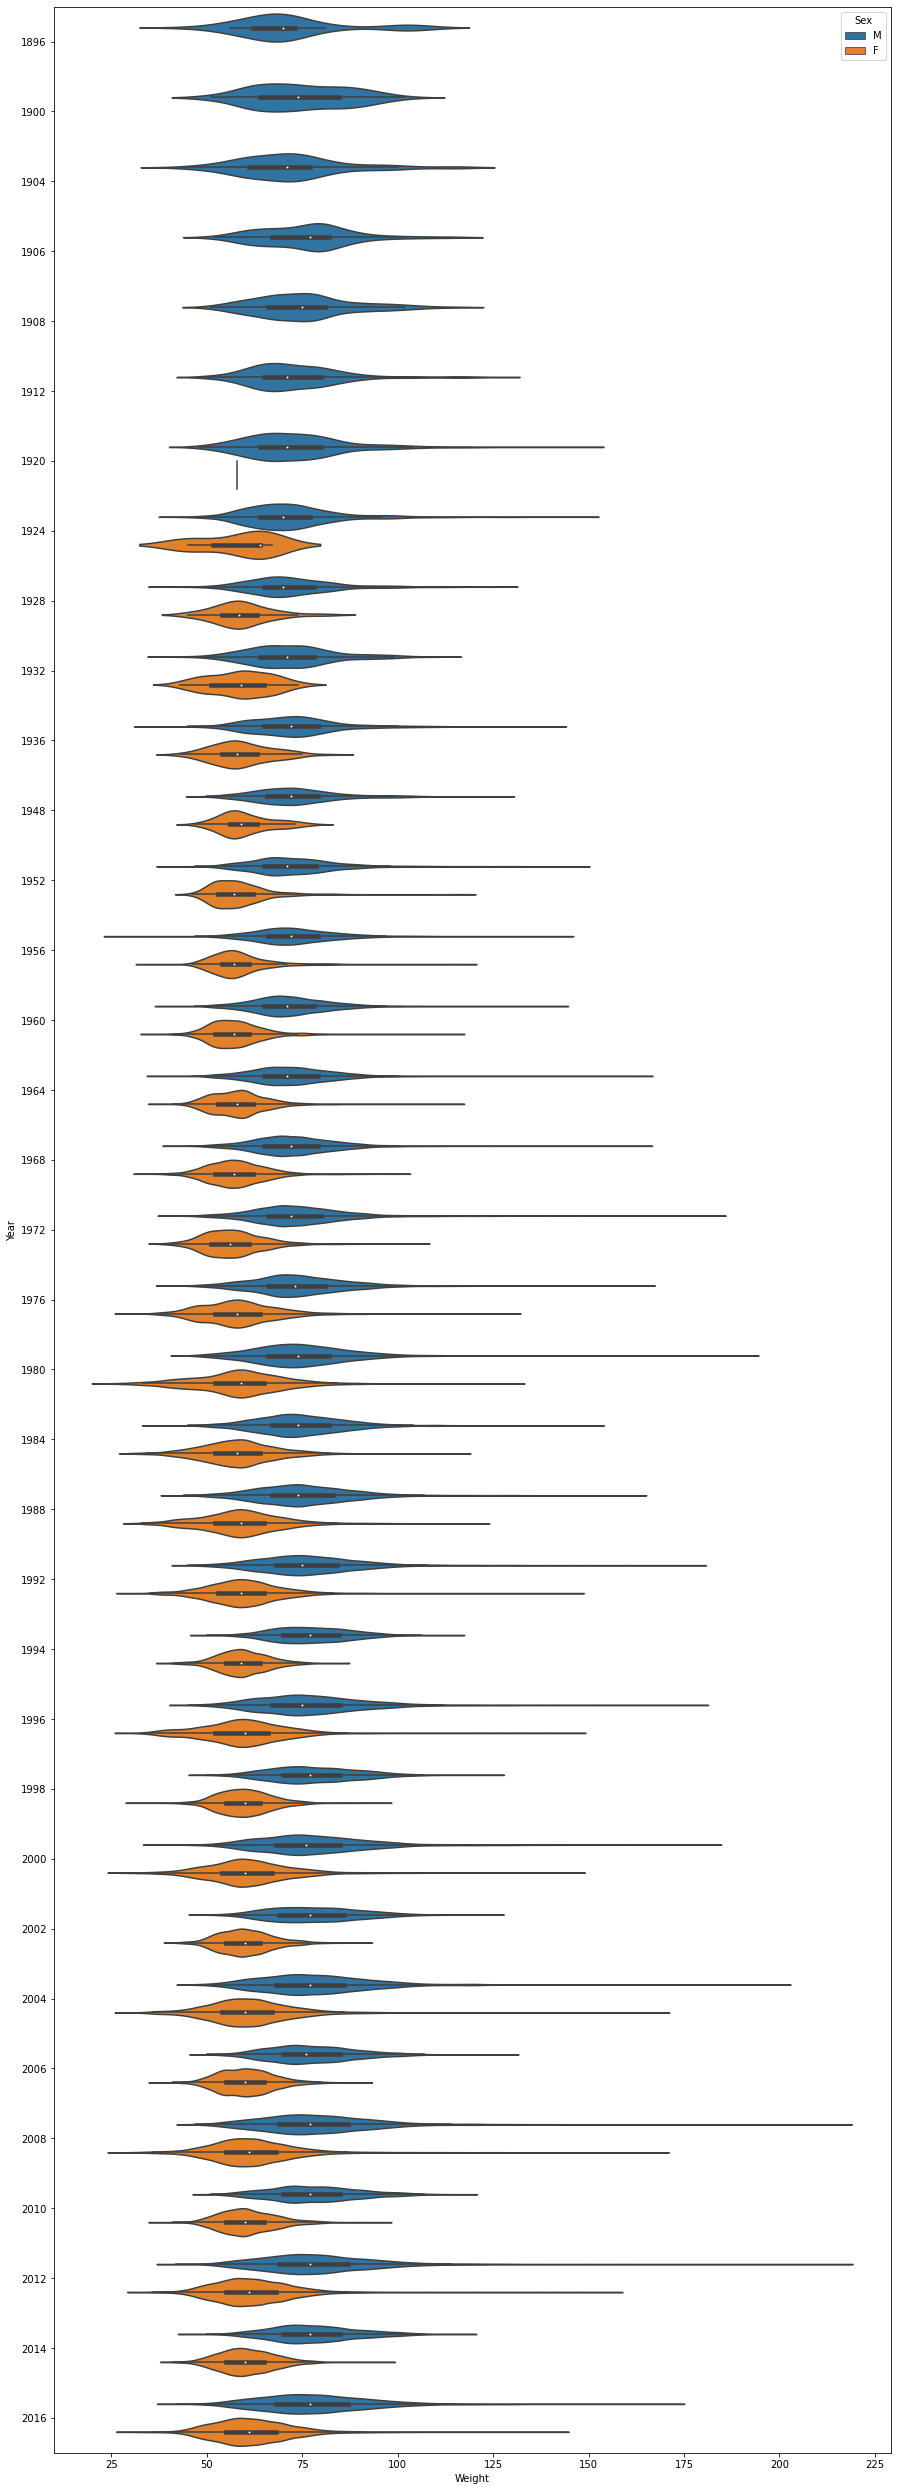

In [261]:
fig,ax = plt.subplots(figsize=(15,45))
sns.violinplot(data=athlete, y="Year",x="Weight", hue='Sex',size='Weight',orient='h')

<AxesSubplot:xlabel='Weight', ylabel='Sex'>

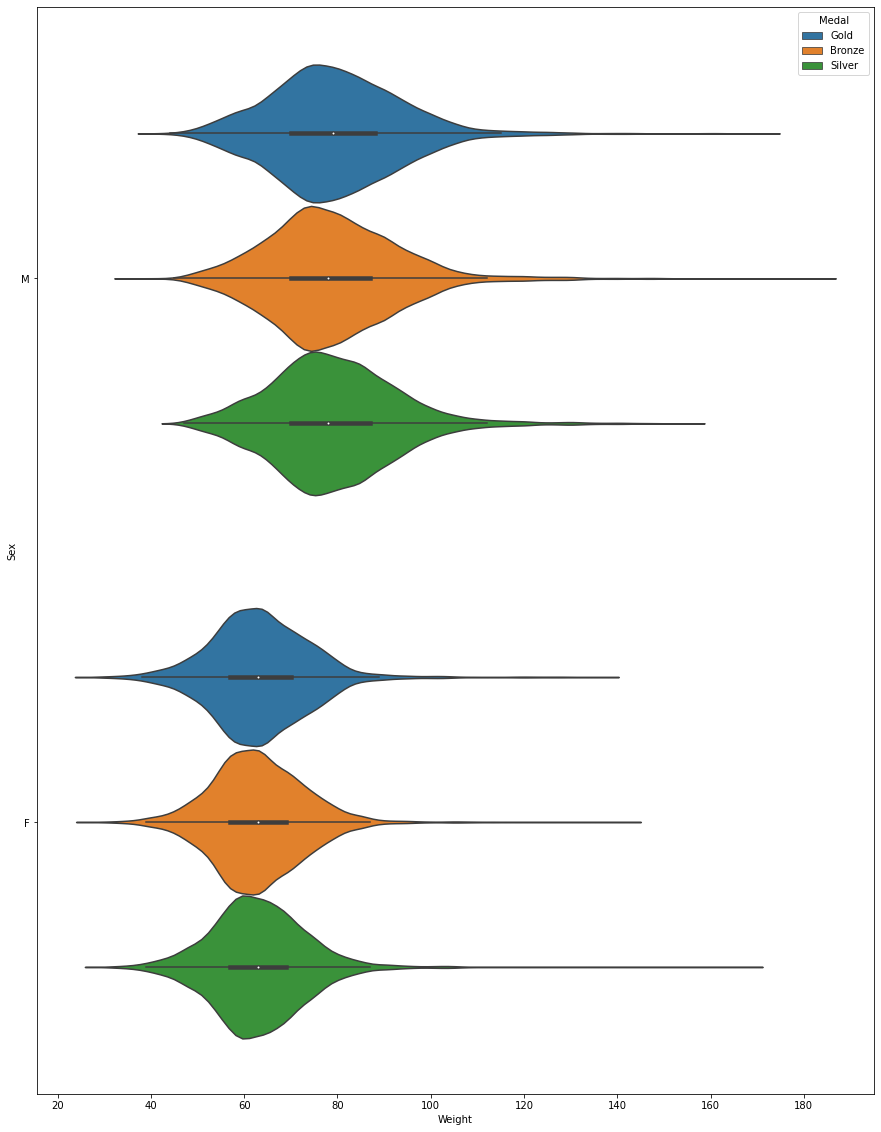

In [259]:
fig,ax = plt.subplots(figsize=(15,20))
sns.violinplot(data=athlete, y="Sex",x="Weight", hue='Medal',size='Weight')

<AxesSubplot:xlabel='City', ylabel='Weight'>

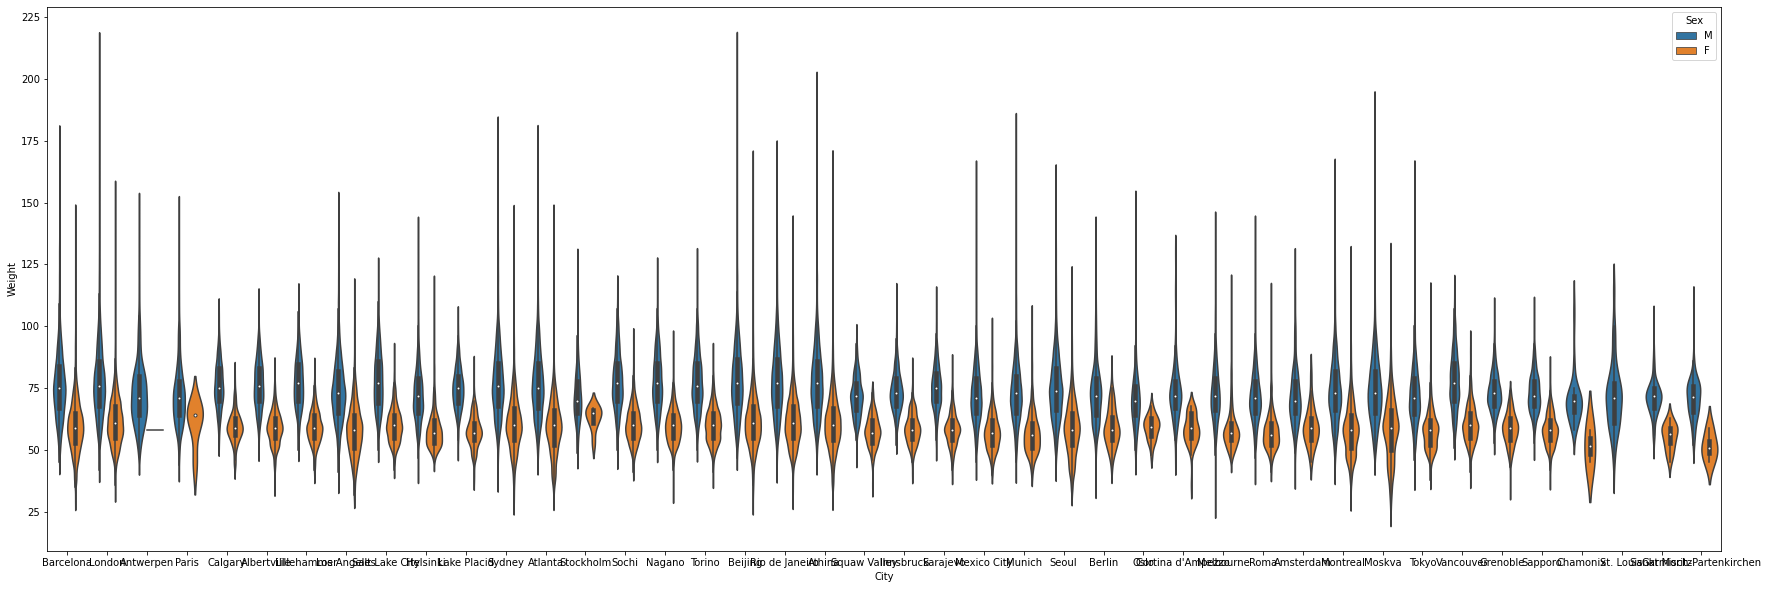

In [267]:
fig,ax = plt.subplots(figsize=(30,10))
sns.violinplot(data=athlete, x="City",y="Weight", hue='Sex',size='Weight')

<AxesSubplot:ylabel='Year'>

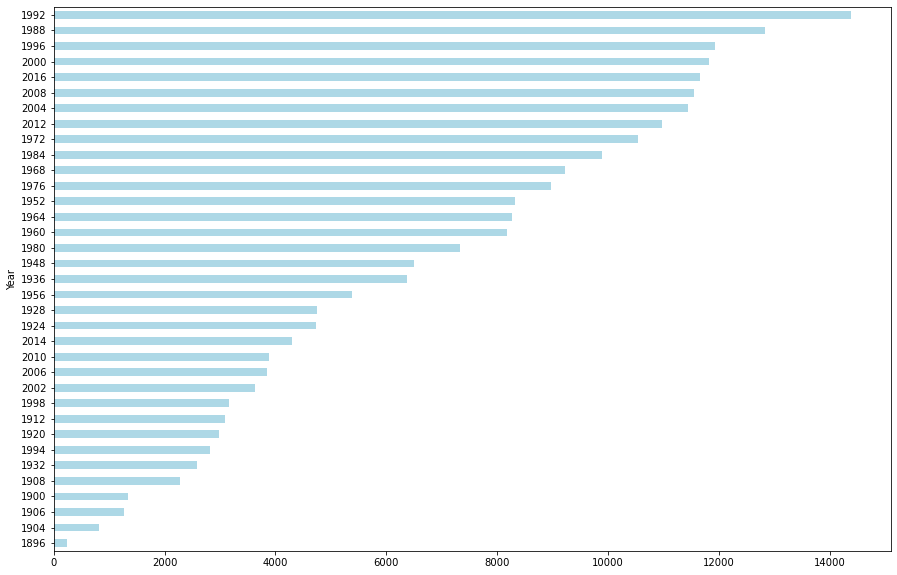

In [273]:
# plot total missing data for each year
athlete["miss_data"] = athlete.isnull().sum(1)
n_miss_data=athlete.groupby(['Year'])['miss_data'].sum().sort_values(ascending=True)
plt.figure(figsize=(15,10))
n_miss_data.plot(kind='barh', color='lightblue')

In [272]:
athlete['Age'].fillna((athlete['Age'].mean()),inplace=True)
athlete['Height'].fillna((athlete['Height'].mean()),inplace=True)
athlete['Weight'].fillna((athlete['Weight'].mean()),inplace=True)

In [278]:
athlete['Medal'].fillna('No Medal',inplace=True)

In [279]:
athlete.isnull().sum()

ID           0
Name         0
Sex          0
Age          0
Height       0
Weight       0
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
miss_data    0
dtype: int64

In [ ]:
# We have now filled in all the missing values

<AxesSubplot:xlabel='Medal', ylabel='count'>

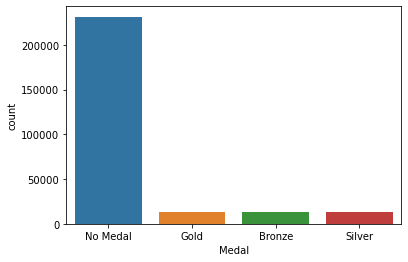

In [280]:
sns.countplot(x=athlete.Medal)

<AxesSubplot:xlabel='Age', ylabel='Count'>

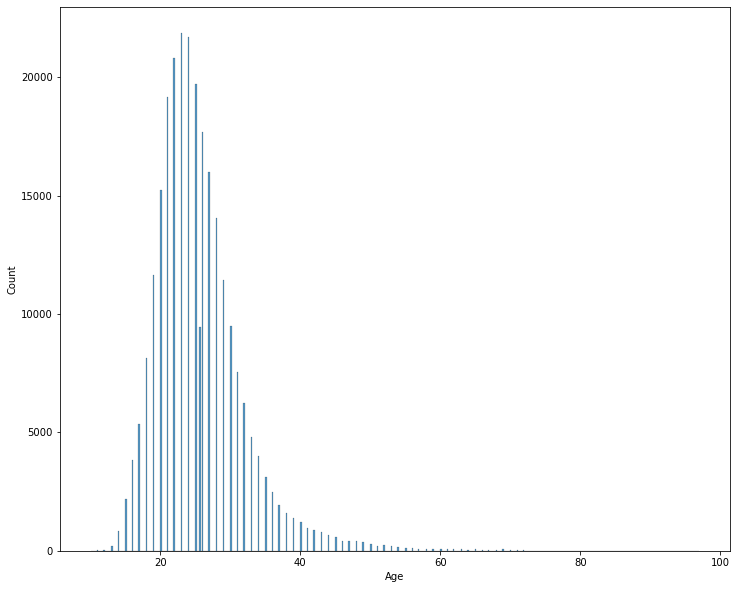

In [282]:
# age distribution of athletes
plt.figure(figsize=(12,10))
sns.histplot(x=athlete.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

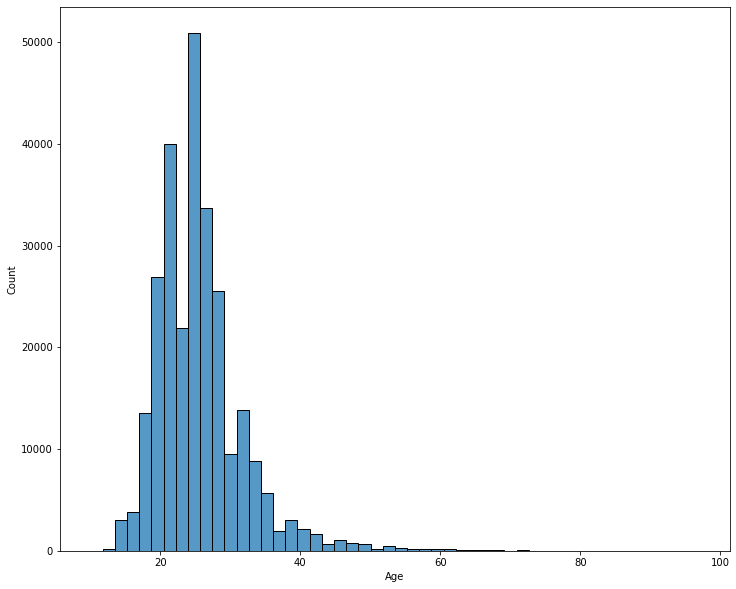

In [286]:
# since the graph is not clear, let's add some bins
# age distribution of athletes
plt.figure(figsize=(12,10))
sns.histplot(x=athlete.Age,bins=(50))

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

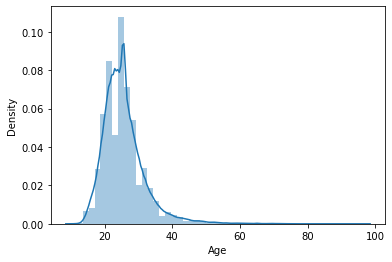

In [287]:
# let's see the age in distplot
sns.distplot(athlete.Age)

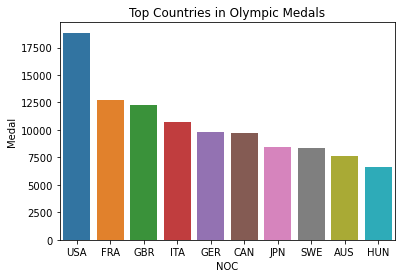

In [300]:
top_countries=athlete.groupby('NOC')['Medal'].count().nlargest(10).reset_index()
sns.barplot('NOC','Medal', data=top_countries)
plt.title('Top Countries in Olympic Medals')
plt.show()

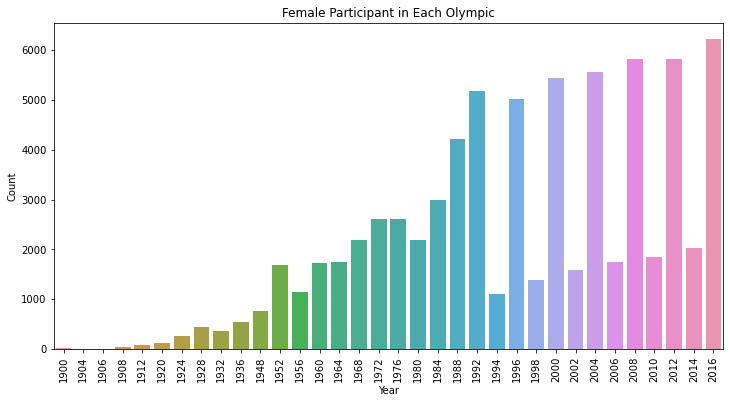

In [303]:
female_participants = athlete.query("Sex == 'F'")[['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
plt.figure(figsize=(12,6))
plt.title('Female Participant in Each Olympic')
plt.xticks(rotation=90)
sns.barplot(data=female_participants,x='Year',y='Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
# the Female participation in Olymppics has been increasing steadily.
# the alternation two year patter that we see starting from 1994 represents the winter olympics

(<AxesSubplot:xlabel='Year', ylabel='Name'>,
 <AxesSubplot:xlabel='Year', ylabel='Name'>)

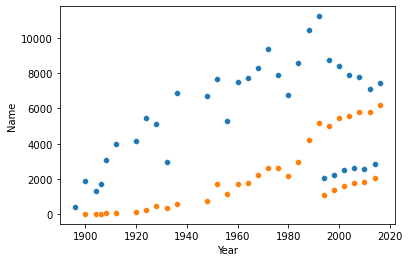

In [327]:
f_year_count = athlete[athlete.Sex=='F'].groupby('Year').agg('count').Name
m_year_count = athlete[athlete.Sex=='M'].groupby('Year').agg('count').Name
(sns.scatterplot(data= m_year_count),
 sns.scatterplot(data =f_year_count))

In [330]:
# the Male participation in Olymppics has been decreasing in the recent years, especially the summer olympics.